In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [191]:
data_frame = pd.read_csv('train (2).csv')

In [159]:
data_frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_survived=data_frame.query('Survived == 1')

Максимальный возраст пассажира умершего и выжившего

In [181]:
data_frame.groupby(['Sex','Age','Survived'],as_index=False).agg({'Age':'max'}).sort_values('Age',ascending=False)

,Sex,Survived,Age
215,male,1,80.00
214,male,0,74.00
213,male,0,71.00
212,male,0,70.50
211,male,0,70.00
...,...,...,...
96,male,1,0.92
95,male,1,0.83
0,female,1,0.75
94,male,1,0.67


Сколько выживших пассажиров по классам.

In [71]:
df_survived.groupby(['Pclass'],as_index=False).agg({'Survived':'count'})

,Pclass,Survived
0,1,136
1,2,87
2,3,119


Количество счастливых билетов

In [69]:
df_survived.groupby('Ticket',as_index=False).agg({'Survived':'count'})\
           .rename(columns={'Survived':'count','0':'percentage'})\
           .sort_values('count',ascending=False)

           

,Ticket,count
46,1601,5
109,2666,4
14,113760,4
155,347742,3
49,17421,3
...,...,...
112,2677,1
113,2687,1
114,2699,1
115,27042,1


Общее количество людей по классам

In [89]:
data_frame.Pclass.value_counts(normalize=True).mul(100).round(2).reset_index()\
          .rename(columns={'index':'Pclass','Pclass':'Count'})
        

,Pclass,Count
0,3,55.11
1,1,24.24
2,2,20.65


Погибшие по полу и классам.
Вывод: Женщин больше погибло из 3его класса, мужчин также. По 1ому классу больше всего выживших.
Скорее всего 3ий класс был на палубе во время катастрофы,и сразу выпали за борт.

In [131]:
count_survived=data_frame.query('Survived==0').groupby(['Sex','Pclass']).agg({'Pclass':'count'})\
        .rename(columns={'Pclass':'count'})

In [132]:
count_survived

count
Sex    Pclass       
female 1           3
       2           6
       3          72
male   1          77
       2          91
       3         300

Процент людей, кто из какого порта.
Вывод:Максимальное количество из порта S - Саутгемптон.

In [22]:
data_frame.Embarked.value_counts(normalize=True).mul(100).round(2).reset_index()\
          .rename(columns={'Embarked':'percentage','index':'Embarked'})

,Embarked,percentage
0,S,72.44
1,C,18.90
2,Q,8.66


Макимальное количество родственников среди выживших
Вывод:Максимальное количество родственников у семьи Asplund

In [13]:
data_frame.query('Survived==1').groupby(['Name','Embarked']).agg({'SibSp':'max'}).sort_values('SibSp',ascending=False)

,,SibSp
Name,Embarked,
"Asplund, Master. Edvin Rojj Felix",S,4
"Andersson, Miss. Erna Alexandra",S,4
"Asplund, Miss. Lillian Gertrud",S,4
"Fortune, Miss. Alice Elizabeth",S,3
"Fortune, Miss. Mabel Helen",S,3
...,...,...
"Longley, Miss. Gretchen Fiske",S,0
"Lulic, Mr. Nikola",S,0
"Lurette, Miss. Elise",C,0


In [ ]:
Макимальное количество родственников среди погибших
Вывод:Максимальное количество родственников у семьи Sage

In [207]:
data_frame.query('Survived==0').groupby(['Name','Embarked']).agg({'SibSp':'max'}).sort_values('SibSp',ascending=False)

,,SibSp
Name,Embarked,
"Sage, Master. Thomas Henry",S,8
"Sage, Miss. Constance Gladys",S,8
"Sage, Mr. Frederick",S,8
"Sage, Mr. Douglas Bullen",S,8
"Sage, Miss. Stella Anna",S,8
...,...,...
"Heininen, Miss. Wendla Maria",S,0
"Hegarty, Miss. Hanora ""Nora""",Q,0
"Hassan, Mr. Houssein G N",C,0


Кого больше было на борту  - мужчин или женщин
Вывод:Мужчин было больше.

In [20]:
data_frame.Sex.value_counts(normalize=True).mul(100).round(2).reset_index()\
          .rename(columns={'Sex':'percentage','index':'Sex'})

,Sex,percentage
0,male,64.76
1,female,35.24


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

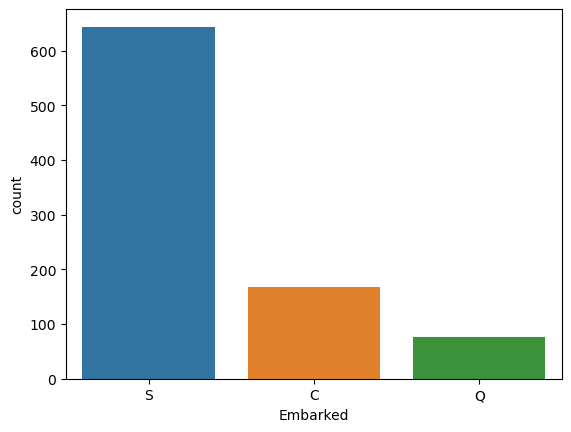

In [73]:
sns.countplot(data_frame.Embarked)

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

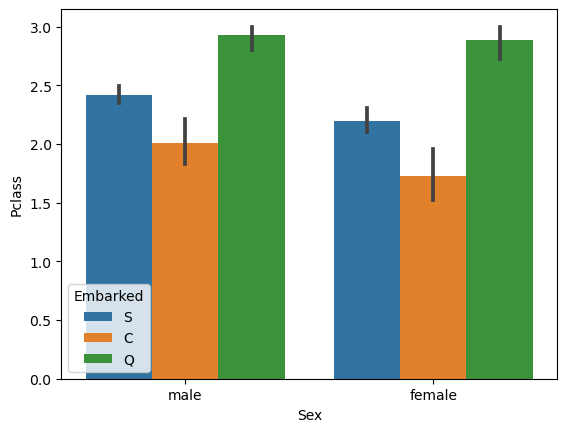

In [99]:
sns.barplot(data=data_frame,x='Sex',y='Pclass',hue='Embarked')

Вывод: Самый дорогой билет оказался счастливым.

In [127]:
data_frame.groupby(['Fare','Pclass','Survived'],as_index=False)\
        .agg({'Fare':'max'})\
        .sort_values('Fare',ascending=False)


,Pclass,Survived,Fare
335,1,1,512.3292
334,1,1,263.0000
333,1,0,263.0000
332,1,1,262.3750
331,1,1,247.5208
...,...,...,...
4,3,0,4.0125
2,3,0,0.0000
1,2,0,0.0000
3,3,1,0.0000
